In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis
## IRIS data

Plotting data according to instructions

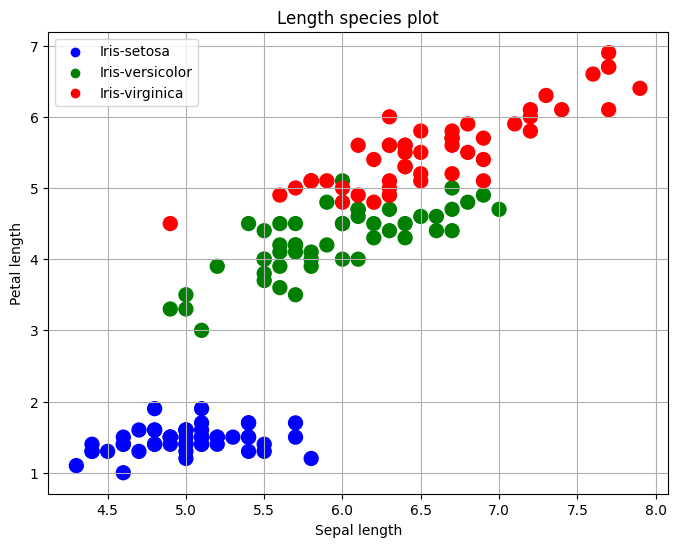

In [2]:
# Define a color map for the categories
color_map = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

# Map the 'species' column to colors
colors = df["species"].map(color_map)

plt.figure(figsize=(8,6))

# Scatter plot 
plt.scatter(df["sepal_length"], df["petal_length"], c=colors, s=100)

# Add a legend for categories
for category, color in color_map.items():
    plt.scatter([], [], c=color, label=f"{category}") 

# Customize the plot
plt.title("Length species plot")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

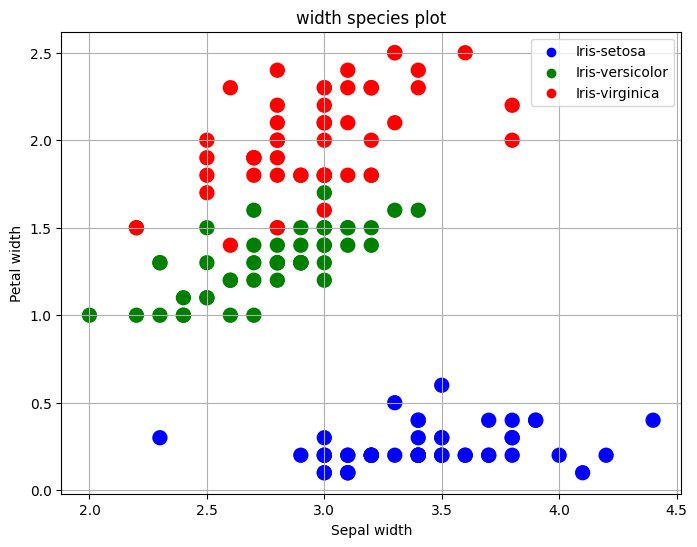

In [3]:
# Define a color map for the categories
color_map = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

# Map the 'species' column to colors
colors = df["species"].map(color_map)

plt.figure(figsize=(8,6))

# Scatter plot 
plt.scatter(df["sepal_width"], df["petal_width"], c=colors, s=100)

# Add a legend for categories
for category, color in color_map.items():
    plt.scatter([], [], c=color, label=f"{category}")  # Dummy scatter for legend

# Customize the plot
plt.title("width species plot")
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Two of the three species appear to have a positive correlation between the measured widths and lengths, while the third species seems to show a random pattern in the visualization.

C:\Users\ounas\AppData\Local\Temp\ipykernel_27092\2864645500.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_by_species, labels=species1)
C:\Users\ounas\AppData\Local\Temp\ipykernel_27092\2864645500.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_by_species, labels=species1)
C:\Users\ounas\AppData\Local\Temp\ipykernel_27092\2864645500.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_by_species, labels=species1)
C:\Users\ounas\AppData\Local\Temp\ipykernel_27092\2864645500.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot()

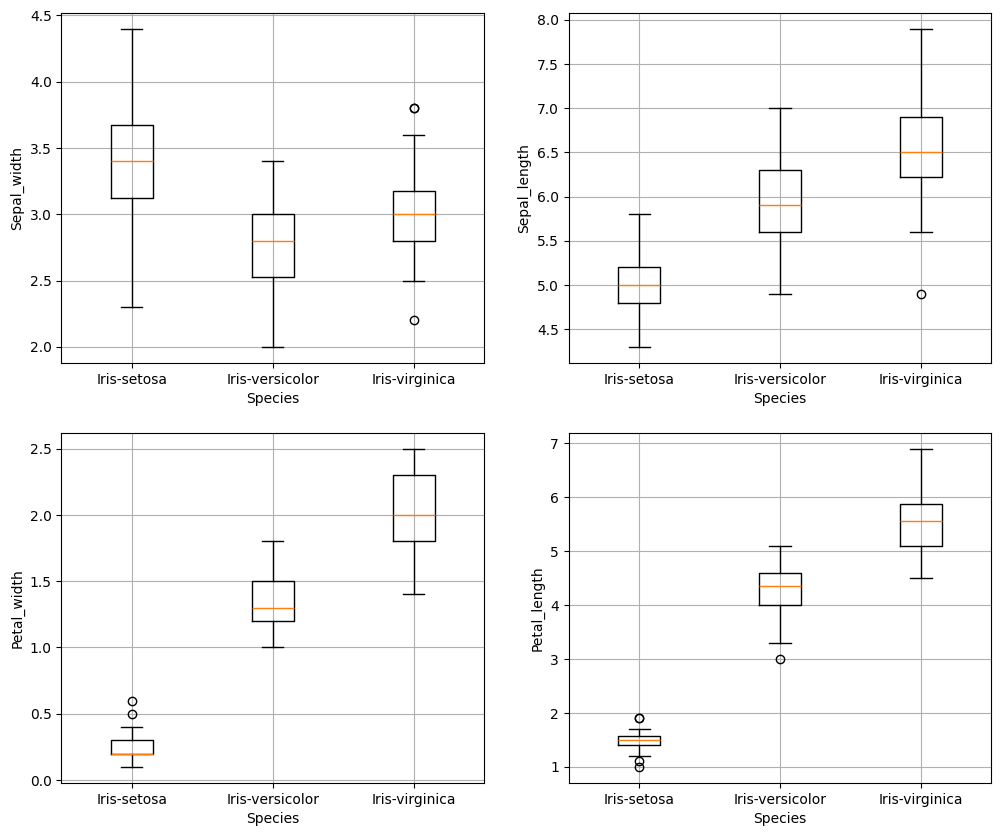

In [4]:
# List of variables to create box plots
variables = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
species1 = df["species"].unique()

# Set up subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for the variables
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, var in enumerate(variables):
    # Group data by species for the current variable
    data_by_species = [df[df["species"] == sp][var] for sp in species1]
    
    # Create a box plot for the current variable
    axes[i].boxplot(data_by_species, labels=species1)
    
    # Customize the plot
    axes[i].set_xlabel("Species")
    axes[i].set_ylabel(var.capitalize())
    axes[i].grid(True)


# Show the plot
plt.show()


From these box plots we can conclude that the third spices, iris-setosa, is behaving differently compared to the other two, with petal having some outliers and a visible different distribution.

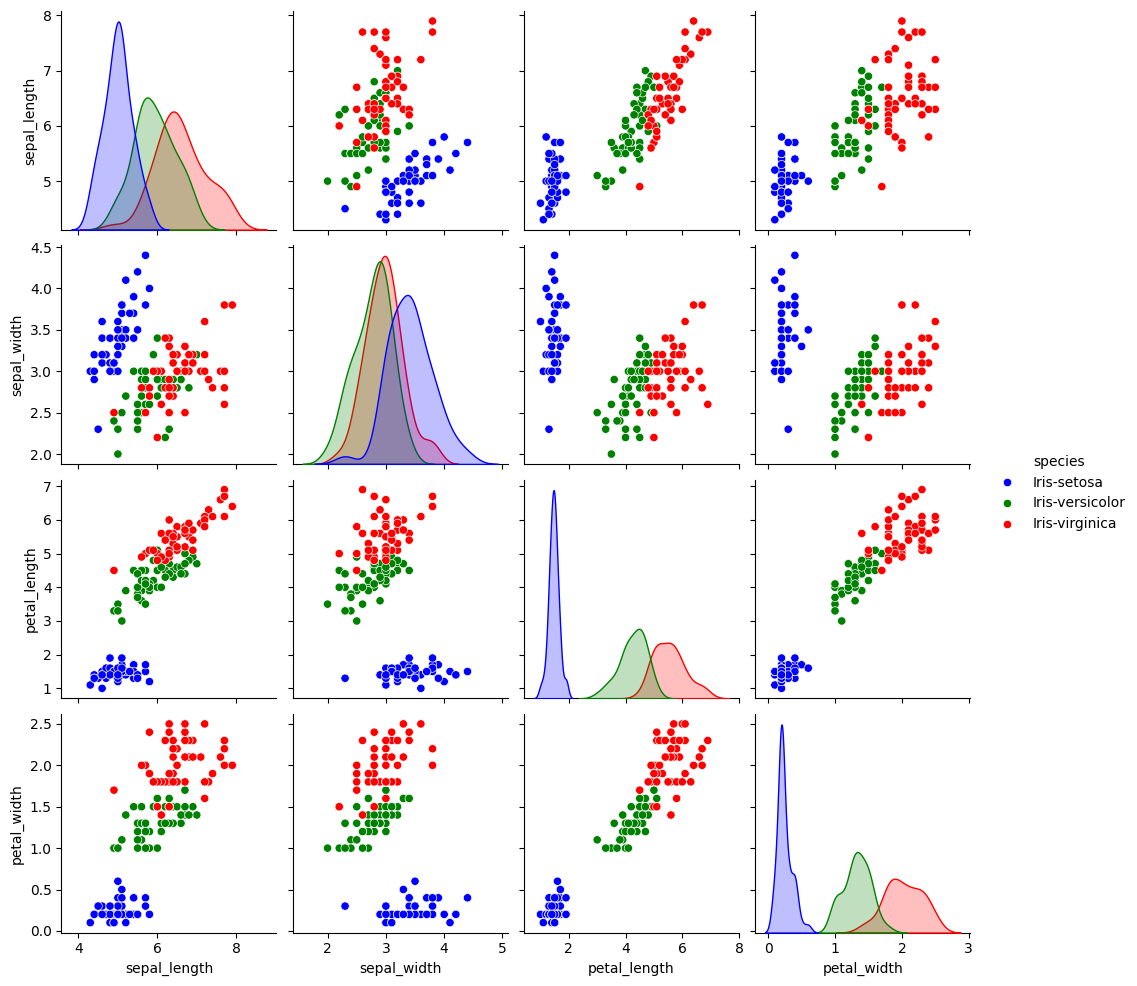

In [5]:
sns.pairplot(df[["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]], 
             hue="species", 
             palette=color_map)
plt.show()



Like mentioned before, there seems to be a positive correlation in some varibles in the case of versicolor and virginica, while setosa looks more random .

## Birdwatching

In [6]:
df_2=pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv")

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      21916 non-null  int64 
 1   Taxonsorteringsordning  21916 non-null  int64 
 2   Rödlistade              4777 non-null   object
 3   Artnamn                 21916 non-null  object
 4   Vetenskapligt namn      21916 non-null  object
 5   Auktor                  21843 non-null  object
 6   Antal                   21916 non-null  object
 7   Ålder/stadium           757 non-null    object
 8   Kön                     2023 non-null   object
 9   Aktivitet               16745 non-null  object
 10  Lokalnamn               21916 non-null  object
 11  Ostkoordinat            21916 non-null  int64 
 12  Nordkoordinat           21916 non-null  int64 
 13  Noggrannhet             21916 non-null  int64 
 14  Diffusion               21916 non-null  int64 
 15  Lä

What are the most prevelant species?

In [7]:
arter = df_2["Artnamn"]

räknade_arter = {}

for i in arter:
    if i in räknade_arter:
        räknade_arter[i] += 1
    else:
        räknade_arter[i] = 1

max_key = max(räknade_arter, key=räknade_arter.get)

max_key

'Koltrast'

What is the monthly distribution of the top 3 most prevelant species?

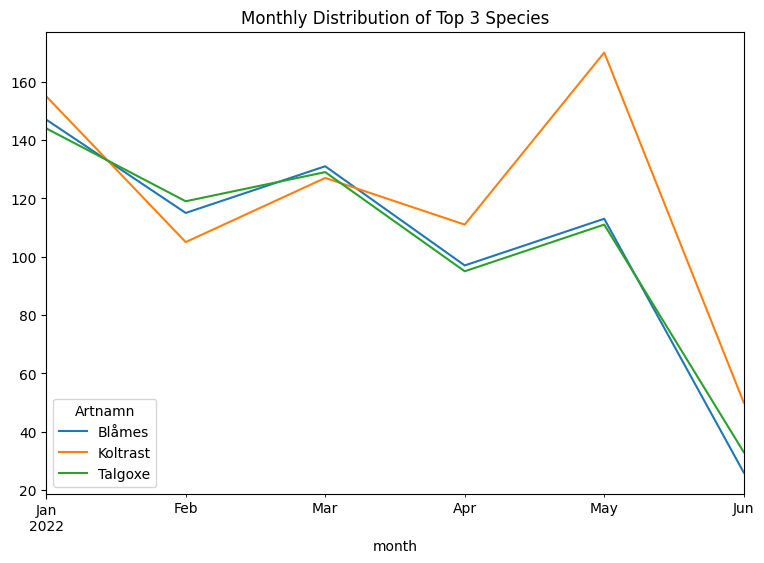

In [8]:
sort_arter = sorted(räknade_arter.items(), key=lambda item: item[1], reverse=True)
top_3 = sort_arter[0:3]
top_3[1]

new_df_2 = df_2[['Artnamn', 'Slutdatum']]
new_df_2 = new_df_2[new_df_2['Artnamn'].isin([top_3[0][0], top_3[1][0], top_3[2][0]])]

new_df_2['Slutdatum'] = pd.to_datetime(new_df_2['Slutdatum'])

new_df_2['month'] = new_df_2['Slutdatum'].dt.to_period('M')

m_counts_df = new_df_2.groupby(['month', 'Artnamn']).size().unstack(fill_value=0)

m_counts_df.plot(
    subplots=False,  # Creates one plot
    figsize=(9, 6),
    title='Monthly Distribution of Top 3 Species'
)

# Step 3: Customize the layout
plt.show()

What are the rarest species?

In [9]:
sort_arter_2 = sorted(räknade_arter.items(), key=lambda item: item[1], reverse=False)

rare_arter = [key for key, value in sort_arter_2 if value == 1]
rare_arter


['Ob. korsnäbb',
 'Strömstare',
 'Fjällvråk',
 'Bändelkorsnäbb',
 'Ormvråk, underarten buteo',
 'Trädlärka',
 'Ob. gås',
 'Röd glada',
 'Forsärla',
 'Knipskrake',
 'Gråhakedopping',
 'Doppingfåglar',
 'Tundrasädgås',
 'Spetsbergsgås',
 'Fiskgjuse',
 'Vinterhämpling',
 'Spillkråka',
 'Ljungpipare',
 'Tornfalk',
 'Ob. bo-/bergfink',
 'Ob. fisk-/silvertärna',
 'Lappsparv',
 'Ejder',
 'Gravand',
 'Mellanskarv',
 'Rödbena',
 'Kustlabb',
 'Bivråk',
 'Ägretthäger',
 'Nordlig gulärla',
 'Varfågel',
 'Prutgås',
 'Storlom',
 'Rosenfink',
 'Måsfåglar']

The list above is all rare species, based on the fact that they were only observed exactly once during the period. One could argue the rarest species is the birds not observed tho.

### My own questions:

1. What % of the bird species observed in the data set was originally named by Carl von Linne?
2. How many of the reported observation was not observed by the reporter?
3. What does the distribution of the observation time look like?


Answer 1:

In [10]:
biglinne_df = df_2[['Auktor', 'Artnamn']]
biglinne_df_u = biglinne_df.drop_duplicates(subset='Artnamn')

linne_df = biglinne_df_u[biglinne_df_u['Auktor'].str.contains('Linnaeus', na=False)]

p = (len(linne_df)/len(biglinne_df_u))*100
print(str(round(p))+"%")


76%


Answer 2:

In [11]:
matched_obs = (df_2['Observatörer']==df_2['Rapportör']).sum()

p2 = (len(df_2) - matched_obs)/len(df_2) * 100

print(str(round(p2))+ "%")

13%


Answer 3:

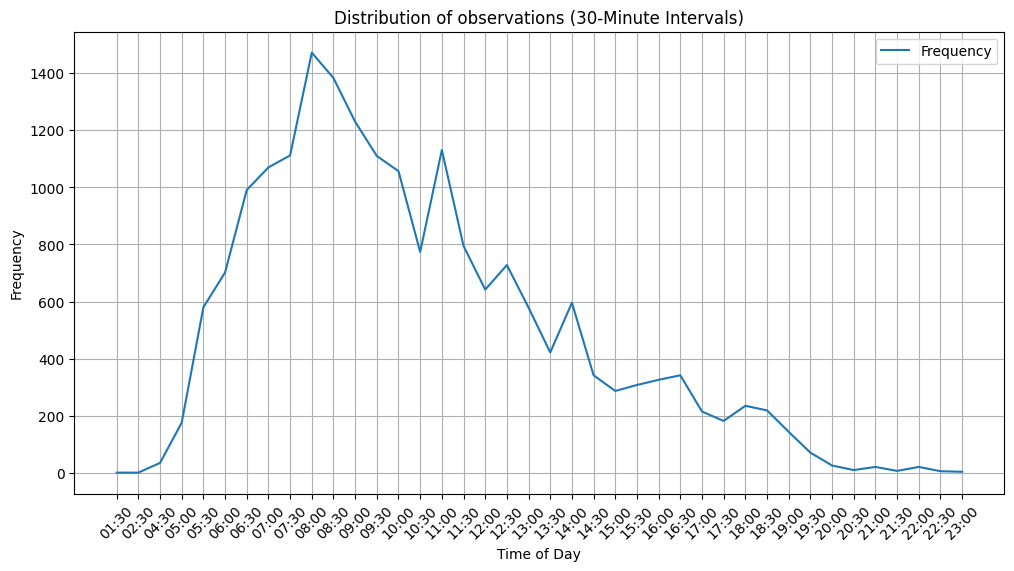

In [12]:
tider = df_2['Starttid']

tider = pd.to_datetime(tider, format='%H:%M', errors='coerce')
tider = tider.dropna()

tider_30min = tider.dt.floor('30min')

# Count occurrences for each 5-minute bin
time_counts = tider_30min.value_counts().sort_index()

time_labels = [time.strftime('%H:%M') for time in time_counts.index]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time_labels, time_counts.values, label='Frequency')
plt.xticks(rotation=45)
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Distribution of observations (30-Minute Intervals)')
plt.grid(True)
plt.legend()
plt.show()


## Predicting Strokes


In [13]:
df_3 = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset is made up of 5110 observations across 11 variables.

In [14]:
df_3.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We are looking at a dataset consisting of covariates of individuals with strokes. We want to understand how the different factors affect the **stroke** variable.

We begin by looking through some plots of the different factors.

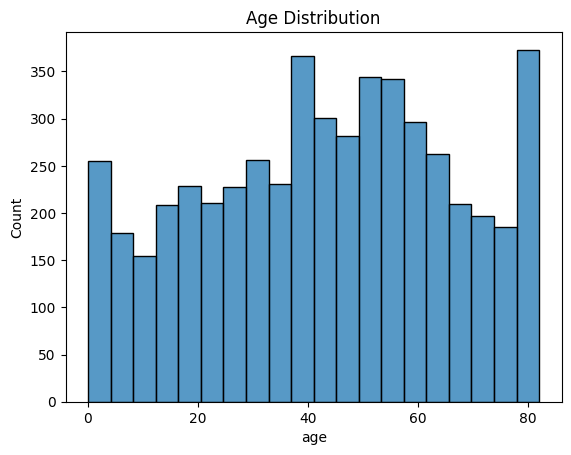

In [15]:
sns.histplot(df_3['age'])
plt.title('Age Distribution')
plt.show()

Age is non balanced in this set.

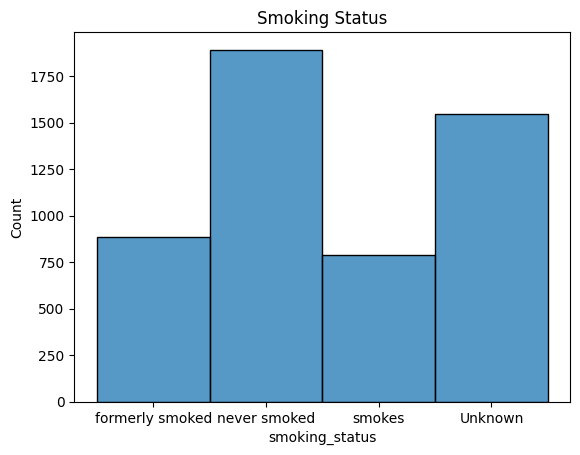

In [16]:
sns.histplot(df_3['smoking_status'])
plt.title('Smoking Status')
plt.show()

The smoking varible is made up of four different smoking conditions, where the "unknown" condition is around one third of the data.

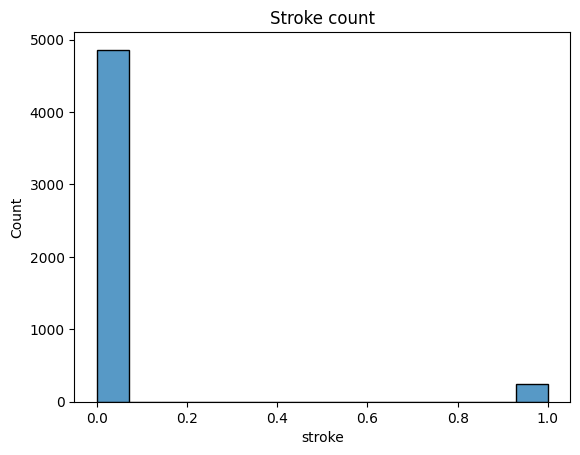

In [17]:
sns.histplot(df_3['stroke'])
plt.title('Stroke count')
plt.show()

Lastly we can see that the stroke varible is a binary varible.

Now we will try to answer 3 questions:

Does any of the varibles seem redundant?

Is there a relationship between hypertension and being married?

How is the relation between gender and strokes?


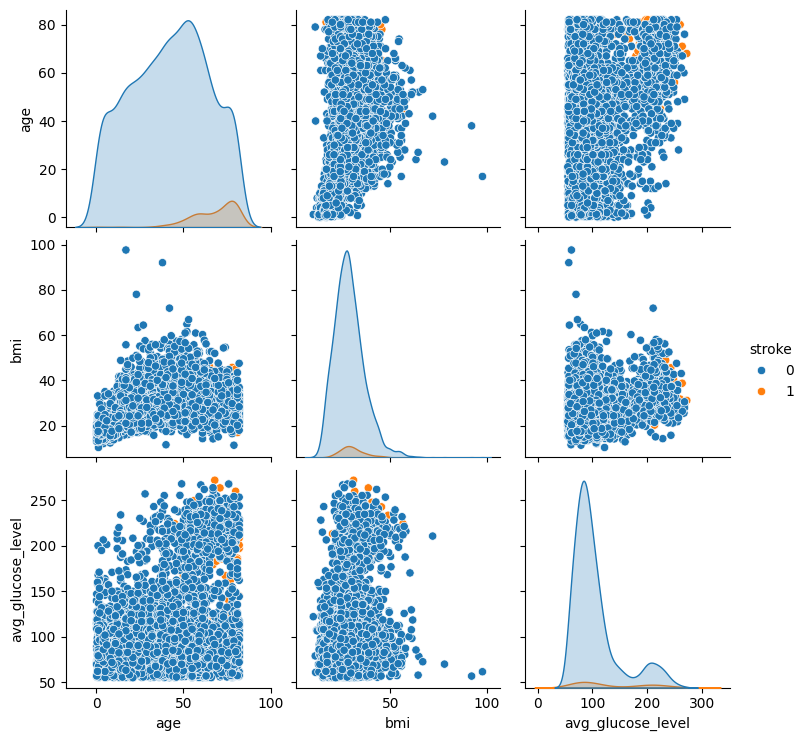

In [18]:
selected_features = ['age', 'bmi', 'avg_glucose_level', 'stroke']
sns.pairplot(df_3[selected_features], hue='stroke')
plt.show()

None of the tested varibles looks redudant, no clear correlation. 

In [19]:
df_m = df_3[['hypertension', 'ever_married']].copy()

df_m['ever_married'] = df_m['ever_married'].map({'Yes': 1, 'No': 0})

grouped = df_m.groupby(['hypertension', 'ever_married']).size().unstack()

grouped


ever_married,0,1
hypertension,,
0,1704,2908
1,53,445


We see that given that you have hypertensions you are around 8x more likely to have been married, compared to 1.7x for non hypertension. This points to a non random relationship between the two variables.

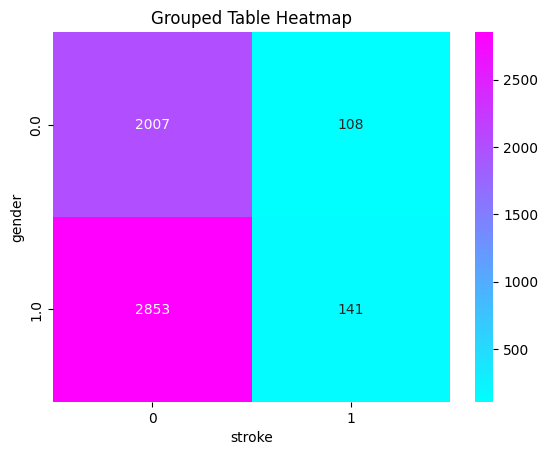

In [20]:
df_g = df_3[['gender', 'stroke']].copy()

df_g['gender'] = df_g['gender'].map({'Female': 1, 'Male': 0})

grouped_g = df_g.groupby(['gender', 'stroke']).size().unstack()

sns.heatmap(grouped_g, annot=True, cmap="cool", fmt="d")
plt.title("Grouped Table Heatmap")
plt.xlabel("stroke")
plt.ylabel("gender")
plt.show()

Does not seem to exist any clear difference between the genders when looking at stroke rates.

## Data preparation

### Cleaning data

We are going to clean a dataset, specifically: 

* Deal with missing values in a suitable way (fill and/or remove missing values)

* Convert all the relevant cells to numbers (not strings)
 

In [21]:
df_4 = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv").copy()

# Function to convert string values to numeric
def convert_to_numeric(value):
    if isinstance(value, str):
        multipliers = {'k': 1e3, 'M': 1e6, 'B': 1e9}
        try:
            # Extract numeric part and suffix
            num_part = float(value[:-1])  # All but the last character
            suffix = value[-1]  # Last character
            return num_part * multipliers.get(suffix, 1)  # Multiply by corresponding multiplier
        except ValueError:
            return np.nan  # Handle invalid entries
    return value  # If not a string, return as-is

df_4.iloc[:, 1:] = df_4.iloc[:, 1:].map(convert_to_numeric) #convert to normal numbers

object_cols = df_4.iloc[:, 1:].select_dtypes(include=['object']).columns #singel out the problematic columns

df_4[object_cols] = df_4[object_cols].apply(pd.to_numeric, errors='coerce') #convert the type

df_4.iloc[:, 1:] = df_4.iloc[:, 1:].ffill(axis=1) #"forward-filling" the missing values

sorted_df = df_4.sort_values(by='2015', ascending=False) 

sorted_df = sorted_df[['iso-3', '2015', '2016', '2017', '2018', '2019']]
sorted_df.head() #presenting it in the desired format

,iso-3,2015,2016,2017,2018,2019
35,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
87,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
86,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
26,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08
